In [5]:
import os
import time

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image
import pickle
from trimesh import Trimesh
import trimesh
import open3d as o3d

import image
from utils import get_integer_segments, plot_region_numbers, triangulate_segments

In [8]:
def get_kf(kf, dataset='tum'):
    dsname = 'kfs_moge_tum' if dataset == 'tum' else 'kfs_moge_realsense'
    with open(f'../data/{dsname}/kf_{int(kf)}.pkl', 'rb') as file:
        data = pickle.load(file)
    return data

def get_SP(data=None, dataset=None, kf=None, SPID=None):
    if data is None and kf is not None and dataset is not None and SPID is not None:
        data = get_kf(kf=kf, dataset=dataset)
    elif data is None or SPID is None:
        raise ValueError('Invalid input. Pass data and SPID, or dataset, kf and SPID.')
    
    sp_regions = data['state_dict']['sp_regions'].cpu().numpy()

    verts = data['state_dict']['pointmap'].cpu().reshape(-1, 3)

    colours = data['state_dict']['image_raw'].cpu().permute(1,2,0).reshape(-1,3)
    colours_4chnl = np.hstack([colours,np.ones((colours.shape[0],1))])
    colours_255 = (colours_4chnl*255).astype('uint8')

    integer_segments = get_integer_segments(sp_regions)

    tris = triangulate_segments(verts, integer_segments)

    meshes = [Trimesh(vertices=verts, faces=individual_tris, vertex_colors=colours_255) for individual_tris in tris]

    return meshes[SPID-1]

def plot_kf(data, figsize=(6,5)):
    sp_regions = data['state_dict']['sp_regions'].cpu().numpy()
    integer_segments = get_integer_segments(sp_regions)
    plot_region_numbers(integer_segments, figsize=figsize)

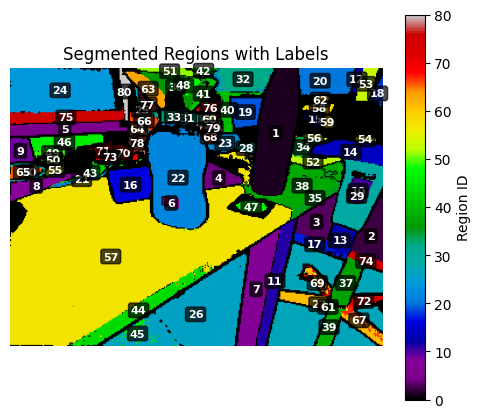

^keyframe 1


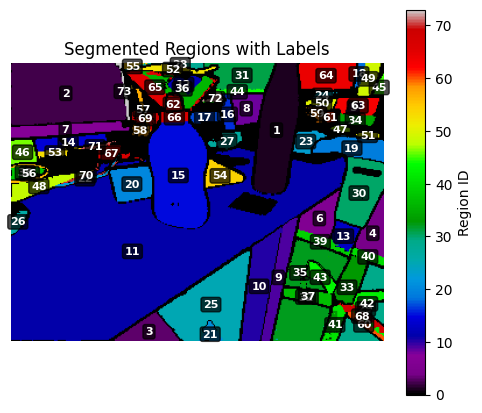

^keyframe 11


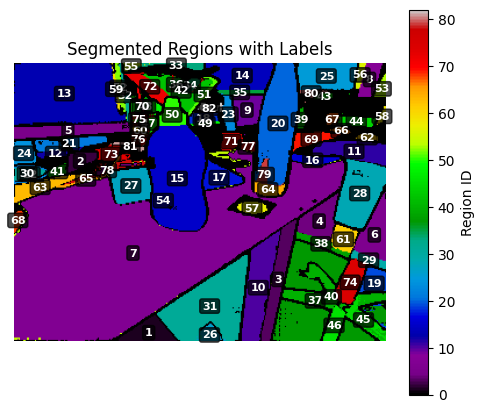

^keyframe 21


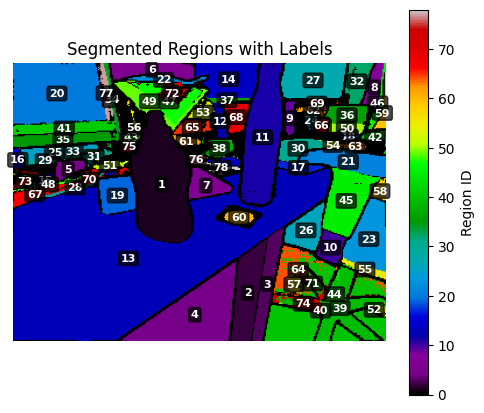

^keyframe 31


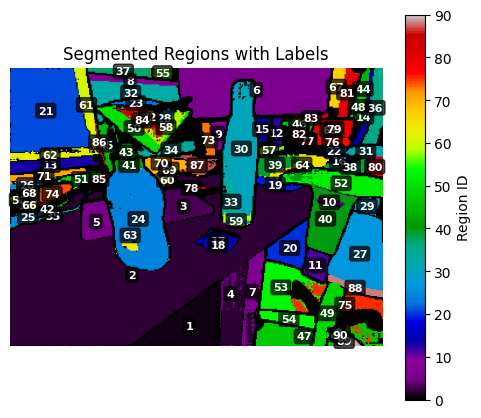

^keyframe 41


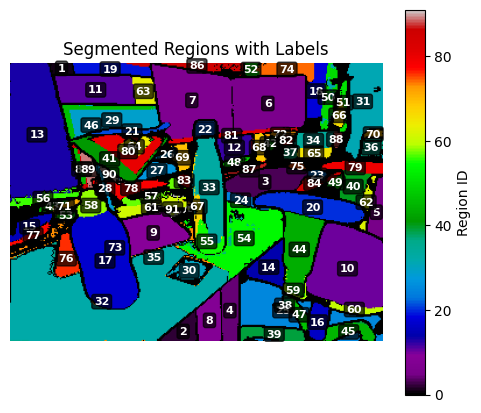

^keyframe 51


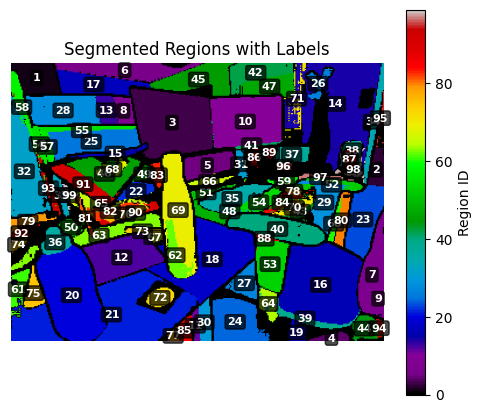

^keyframe 61


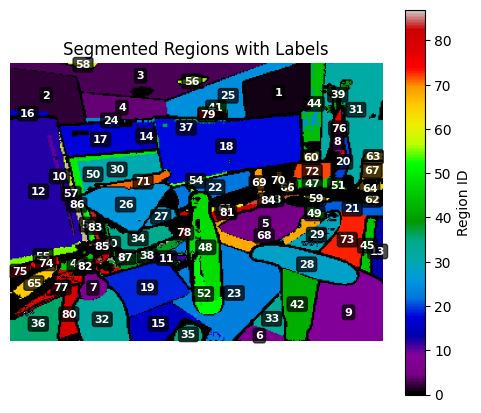

^keyframe 71


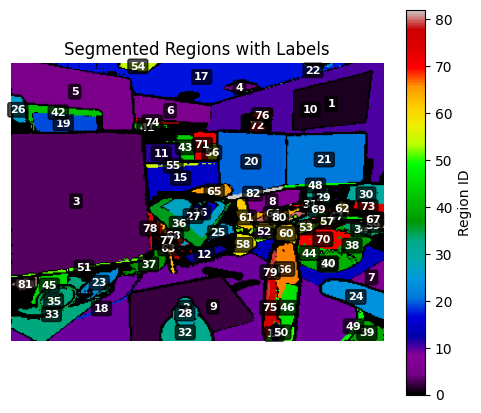

^keyframe 81


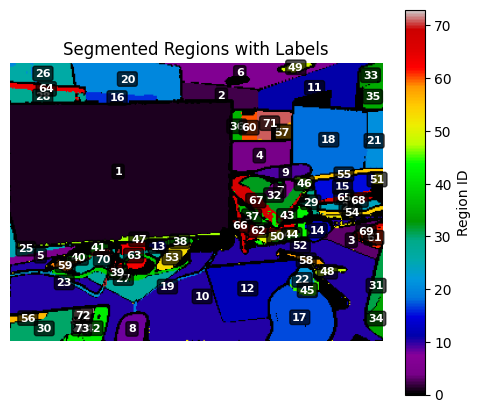

^keyframe 91


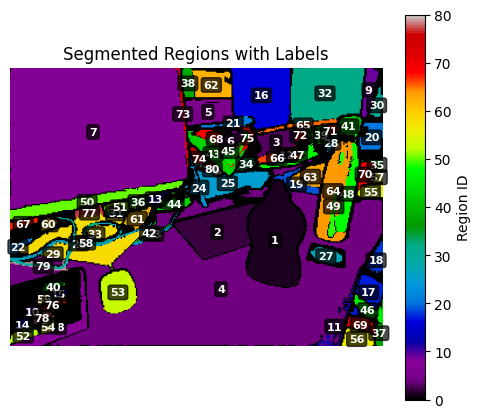

^keyframe 101


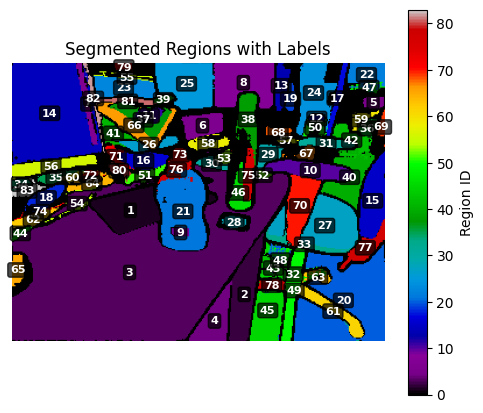

^keyframe 111


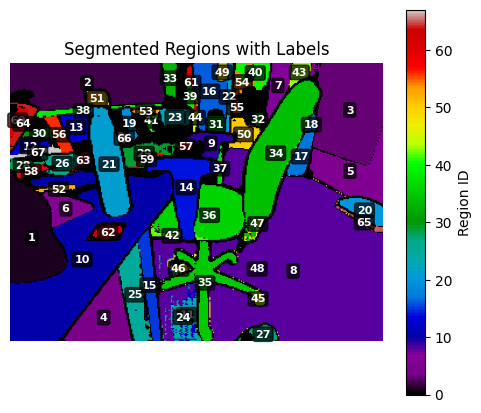

^keyframe 121


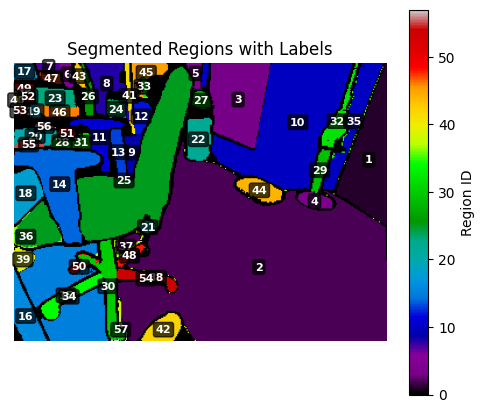

^keyframe 131


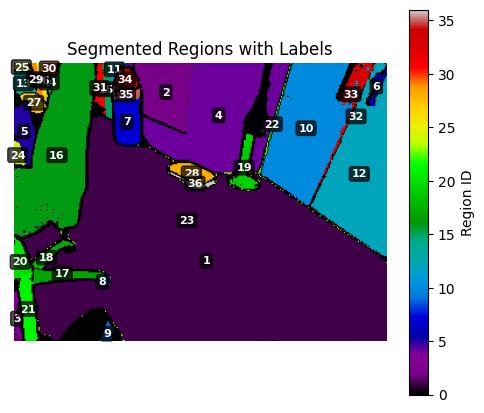

^keyframe 141


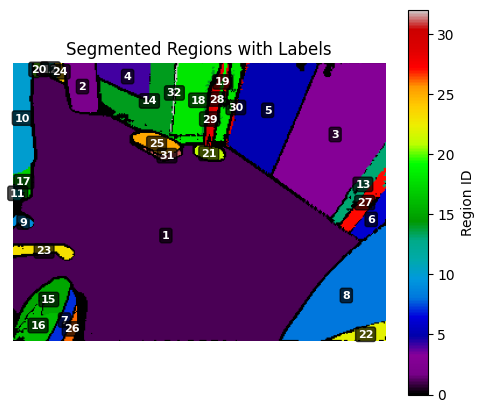

^keyframe 151


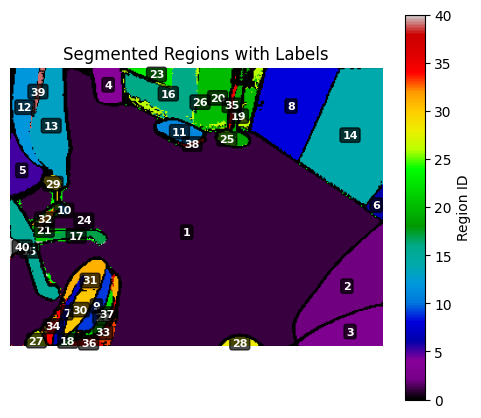

^keyframe 161


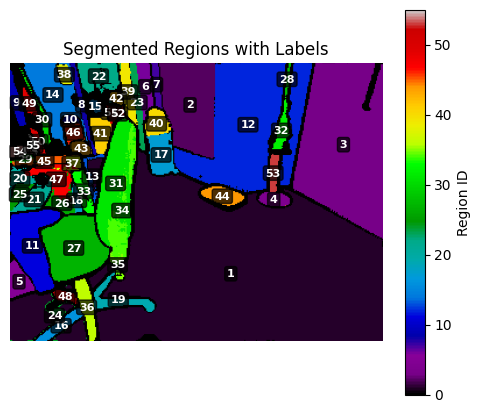

^keyframe 171


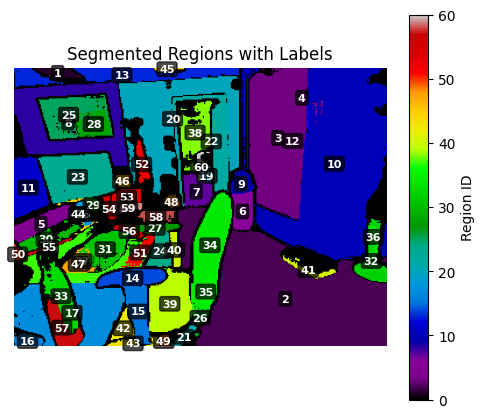

^keyframe 181


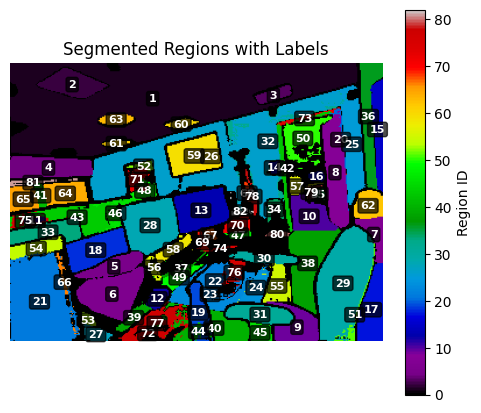

^keyframe 191


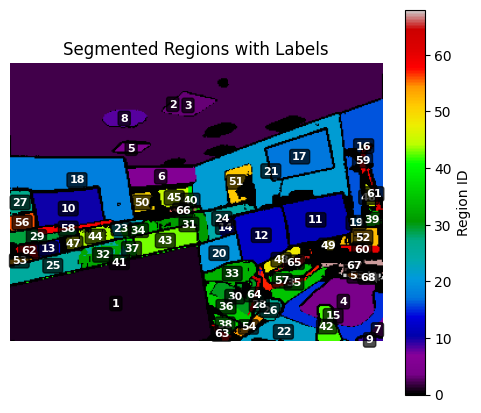

^keyframe 201


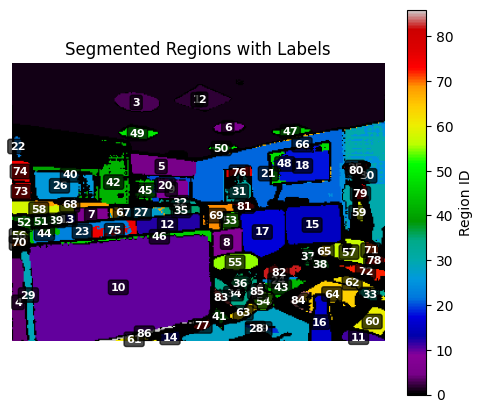

^keyframe 211


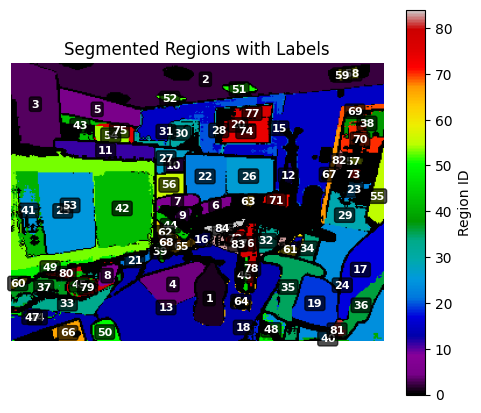

^keyframe 221


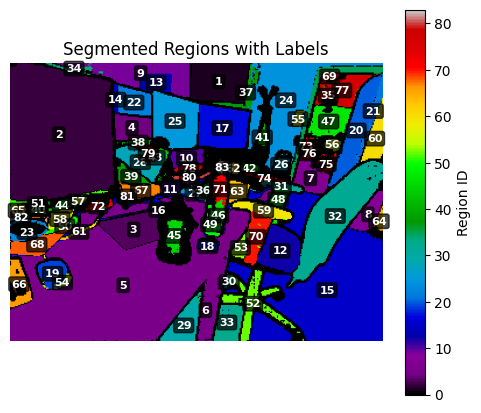

^keyframe 231


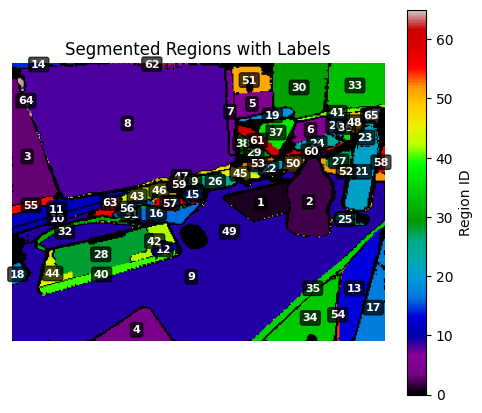

^keyframe 241


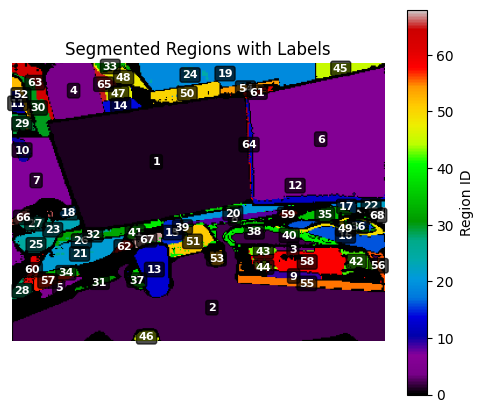

^keyframe 251


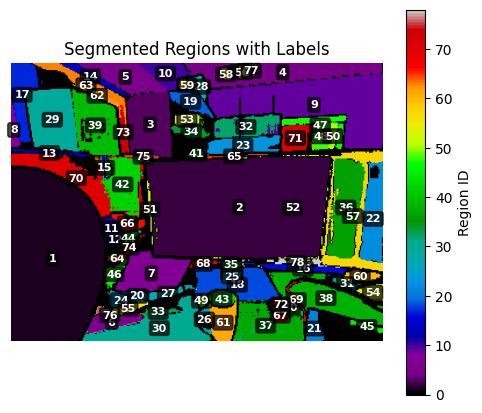

^keyframe 261


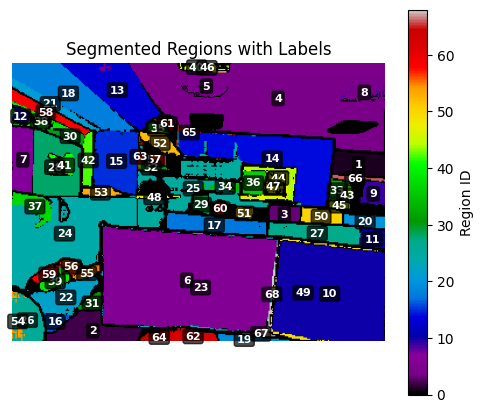

^keyframe 271


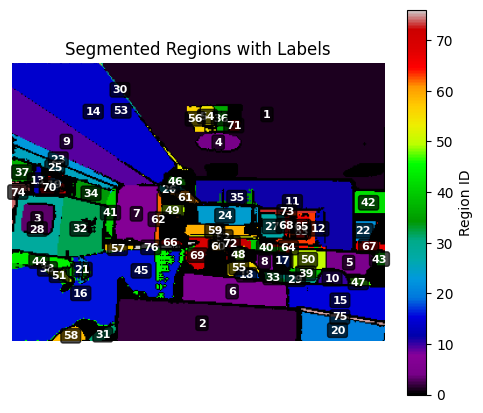

^keyframe 281


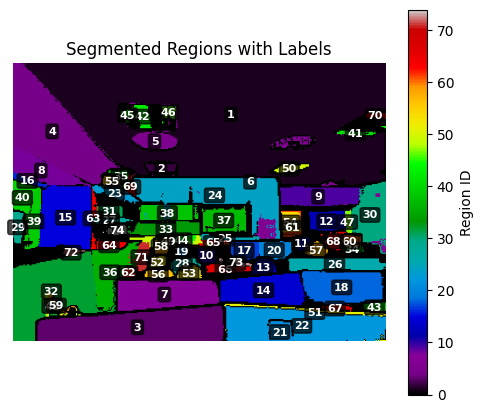

^keyframe 291


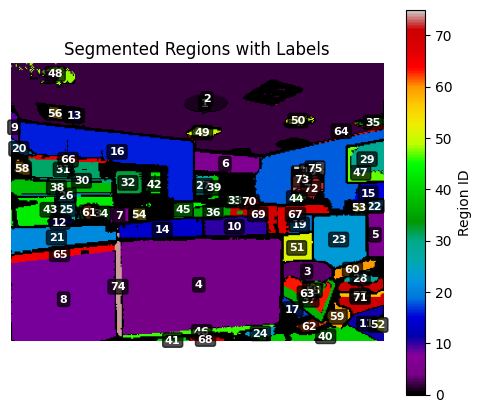

^keyframe 301


In [7]:
for i in range(31):
    kfid = 10*i + 1
    data = get_kf(kfid, 'not_tum')
    plot_kf(data)
    print(f'^keyframe {kfid}')

SP 34 on frame 51

SP 23 on frame 91

In [14]:
meshA = get_SP(dataset='kfs_moge_realsense', kf=141, SPID=16)
# meshB = get_SP(dataset='kfs_moge_realsense', kf=231, SPID=32)

# meshA.export('chair_1_unposed.ply')
# meshB.export('chair_2_unposed.ply')
meshA.show()

In [15]:
meshA_posed = trimesh.load('meshes/chair_1.ply', file_type='ply')
meshB_posed = trimesh.load('meshes/chair_2.ply', file_type='ply')

In [17]:
meshA_posed = o3d.io.read_triangle_mesh('meshes/chair_1.ply')
meshB_posed = o3d.io.read_triangle_mesh('meshes/chair_2.ply')

o3d.visualization.draw_geometries([meshA_posed, meshB_posed])

In [19]:
from fuse_meshes import mesh_fusion
import open3d as o3d

mesh_fusion(
    fname_in_1='chair_1.ply',
    fname_in_2='chair_2.ply',
    fname_out='chair_fused.ply'
)

fused_mesh = o3d.io.read_triangle_mesh('meshes/chair_fused.ply')

Fused mesh saved to meshes/chair_fused.ply


In [21]:
o3d.visualization.draw_geometries([fused_mesh])